In [14]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import scipy
from scipy.cluster import hierarchy
global g
import time

In [15]:
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

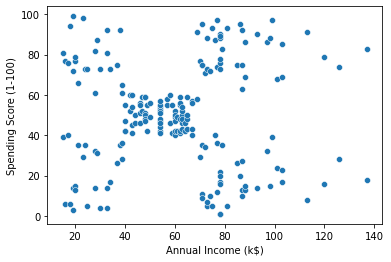

In [16]:
data = data[['Annual Income (k$)', 'Spending Score (1-100)']] 
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data)

In [17]:
dt = np.asarray(data)
keys = dt.shape[0]
print(keys)

200


In [18]:
def subtract(indices,splinter):

Z = squareform(pdist(dt, "euclidean"))

{0: [0], 1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6], 7: [7], 8: [8], 9: [9], 10: [10], 11: [11], 12: [12], 13: [13], 14: [14], 15: [15], 16: [16], 17: [17], 18: [18], 19: [19], 20: [20], 21: [21], 22: [22], 23: [23], 24: [24], 25: [25], 26: [26], 27: [27], 28: [28], 29: [29], 30: [30], 31: [31], 32: [32], 33: [33], 34: [34], 35: [35], 36: [36], 37: [37], 38: [38], 39: [39], 40: [40], 41: [41], 42: [42], 43: [43], 44: [44], 45: [45], 46: [46], 47: [47], 48: [48], 49: [49], 50: [50], 51: [51], 52: [52], 53: [53], 54: [54], 55: [55], 56: [56], 57: [57], 58: [58], 59: [59], 60: [60], 61: [61], 62: [62], 63: [63], 64: [64], 65: [65], 66: [66], 67: [67], 68: [68], 69: [69], 70: [70], 71: [71], 72: [72], 73: [73], 74: [74], 75: [75], 76: [76], 77: [77], 78: [78], 79: [79], 80: [80], 81: [81], 82: [82], 83: [83], 84: [84], 85: [85], 86: [86], 87: [87], 88: [88], 89: [89], 90: [90], 91: [91], 92: [92], 93: [93], 94: [94], 95: [95], 96: [96], 97: [97], 98: [98], 99: [99], 100: [100], 101: [1

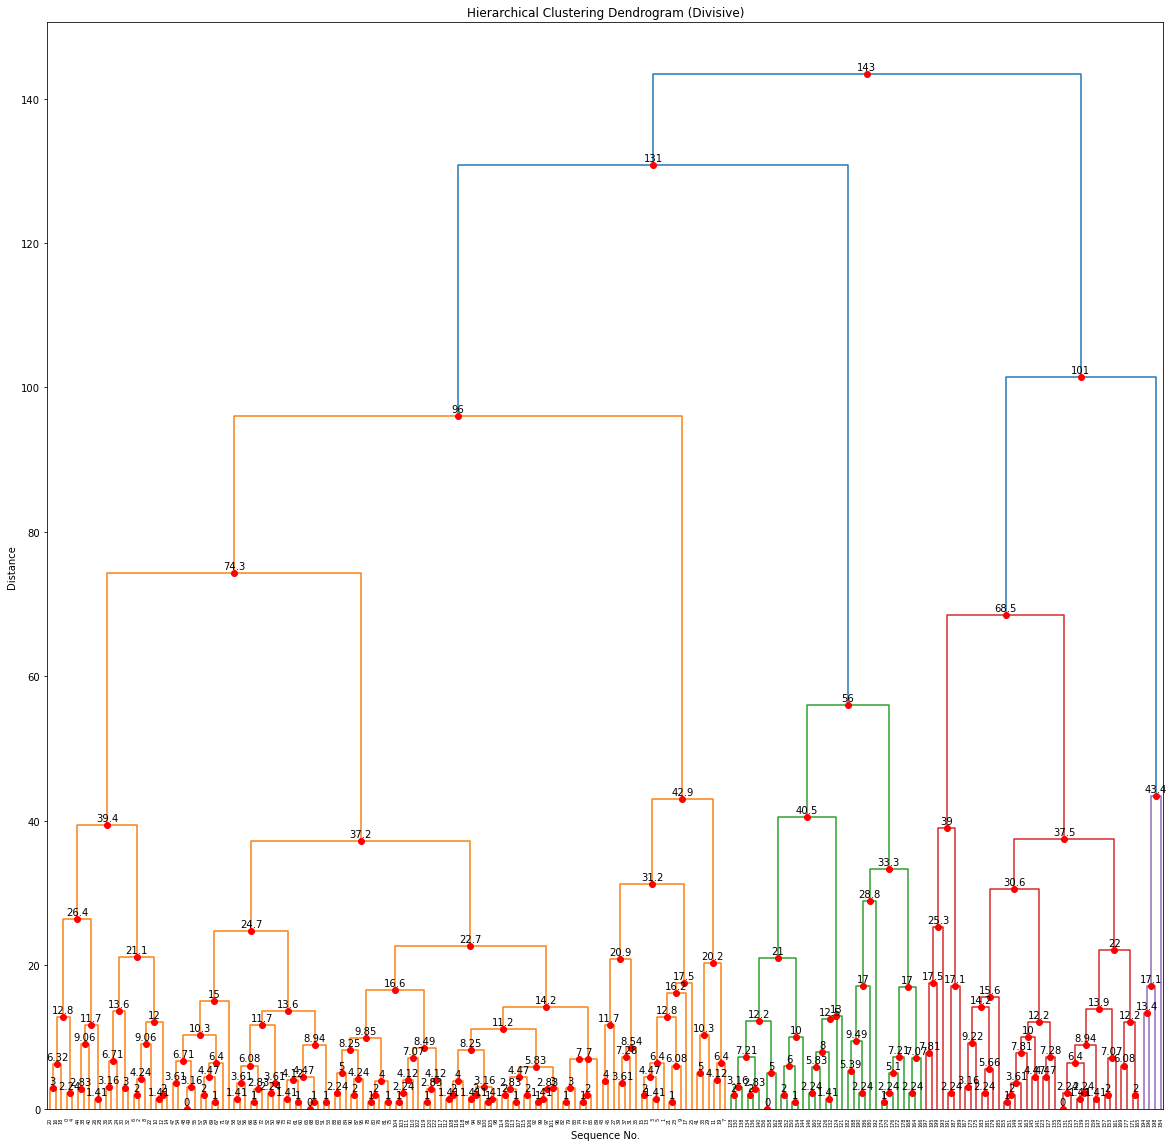

In [25]:
def subtract(indices,splinter):
	l3 = [x for x in indices if x not in splinter]
	return l3
	
def divisive(a,indices,splinter,sub):
	if(len(indices)==1):
		return
	avg=[]
	flag=0
	for i in indices:
		if(i not in splinter):
			sum=0
			for j in indices:
				if(j not in splinter):
					sum=sum+a[i][j]
			if((len(indices)-len(splinter)-1)==0):
				avg.append(sum)
			else:
				avg.append(sum/(len(indices)-len(splinter)-1))
	if(splinter):
		k=0
		for i in sub:
			total=0
			for j in splinter:	
				total=total+a[i][j]
			avg[k]=avg[k] - (total/(len(splinter)))
			k+=1
		positive=[]				
		for i in range(0,len(avg)):
			if(avg[i]>0):
				positive.append(avg[i])
				flag=1
		if(flag==1):
			splinter.append(sub[avg.index(max(positive))])
			sub.remove(sub[avg.index(max(positive))])
			divisive(a,indices,splinter,sub)
	else:
		splinter.append(indices[avg.index(max(avg))])
		sub[:]=subtract(indices,splinter)
		divisive(a,indices,splinter,sub)

def original_subset(indices):
	sp=np.zeros(shape=(len(indices),len(indices))) 
	for i in range(0,len(indices)):
		for j in range(0,len(indices)):
			sp[i][j]=a[indices[i]][indices[j]]
	return sp
	
def original_max(x):
	new=original_subset(x)
	return new.max()

def diameter(l):
	return original_max(l)
	
def recursive(a,indices,u,v,clusters,g):
	clus_s.append(len(indices))
	d.append(diameter(indices))
	parents[g]=indices
	g-=1
	divisive(a,indices,u,v)
	clusters.append(u)
	clusters.append(v)
	new=[]
	for i in range(len(clusters)):
		new.append(clusters[i])
	final.append(new)
	x=[]
	y=[]
	store_list=[]
	max=-1
	f=0
	for list in clusters:
		if(diameter(list)>max):
			if(len(list)!=1):
				f=1
				max=diameter(list)
				store_list=(list)
	if(f==0):
		return
	else:
		clusters.remove(store_list)	
		recursive(a,store_list,x,y,clusters,g)

def augmented_dendrogram(*args, **kwargs):
	data = scipy.cluster.hierarchy.dendrogram(*args, **kwargs)
	if not kwargs.get('no_plot', False):
		for i, d in zip(data['icoord'], data['dcoord']):
			x = 0.5 * sum(i[1:3])
			y = d[1]
			plt.plot(x, y, 'ro')
			plt.annotate("%.3g" % y, (x, y), xytext=(0,12),textcoords='offset points',va='top', ha='center')
	return data


from scipy.spatial.distance import pdist, squareform

Z = squareform(pdist(dt, "euclidean"))
a=Z
size=len(a)
g=(size-1)*2
parents={}
final=[]
clusters=[]
indices=[]
clus_s=[]
d=[]
Z=np.zeros(shape=(size-1,4))
p=[]
q=[]
ans=[]
for i in range(0,len(a)):
	indices.append(i)

for i in range(0,size):
	list=[]
	list.append(i)
	parents[i]=list
print(parents)
start=time.time()
recursive(a,indices,p,q,clusters,g)


print("Clustering done\t" + str(time.time()-start))
for i in range(0,len(d)):
	Z[size-i-2][2]=d[i]
	Z[size-i-2][3]=clus_s[i]

for i in range(len(final)-1,0,-1):
	for j in range(0,len(final[i-1])):
		if final[i-1][j] not in final[i]:
			ans.append(final[i-1][j])

ans.append(indices)

for i in range(0,len(ans)):
	if(len(ans[i])<=2):
		Z[i][0]=ans[i][0]
		Z[i][1]=ans[i][1]
	else:
		s=0
		add=[]
		common=[]
		for j in range(len(ans)-1,-1,-1):
			if(set(ans[j])<set(ans[i])):
				common=ans[j]
				break;
		x=(subtract(ans[i],common))
		for key in parents.keys():
			if(parents[key]==common):
				Z[i][0]=key
				break;
		for key in parents.keys():
			if(set(parents[key])==set(x)):
				Z[i][1]=key
				s=1
				break;
		if(s==0):
			print(Z[i][0],Z[i][1],x)
	 
names=[i for i in range(0,size)]
plt.figure(figsize=(20, 20))
plt.title('Hierarchical Clustering Dendrogram (Divisive)')
plt.xlabel('Sequence No.')
plt.ylabel('Distance')
augmented_dendrogram(Z)
plt.show()